In [1]:
!pip install opencv-python
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans
import json # library to handle JSON files
import requests # library to handle requests
import folium # map rendering library
import cv2, os
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from scipy import stats
import seaborn as sns; sns.set()
import math
import folium
from folium.features import DivIcon
matplotlib.use('Agg')
matplotlib.style.use('fivethirtyeight')
from sklearn.datasets import fetch_lfw_people, fetch_olivetti_faces
%matplotlib inline
from ipywidgets import interact


# JNB LAB: Linear Algebra for Data Analysis

Here is an example of OLS linear regression using  the datafile "ACTCollegeEligible.csv" for ACT Scores and College Eligibility.

1) Import Libraries, dropping rows with missing data.

In [2]:
df=pd.read_csv("ACTCollegeEligible.csv")
df=df.dropna()
df.head(2)

,School Name,Street Address,ZIP,Average Score ACT 2012,5-Year Cohort Graduation Rate 2012 - Percent,One-Year Dropout Rate 2012 - Percent,Freshman On-Track to Graduate 2012 - Percent,College Eligibility 2012 - Percent,College Enrollment 2012 - Percent,College Retention 2010 - Percent,Misconducts Resulting in Suspensions 2012 - Percent,Average Days of Suspension 2012,Student Attendance 2012 - Percent,Teacher Attendance 2012 - Percent,X Coordinate,Y Coordinate,Longitude,Latitude,Location
0,Chicago Academy High School,3400 N Austin Ave,60634,19.3,71.0,4.0,82.2,35.2,75.8,71.0,4.5,2.6,93.6,95.6,1135740.091,1922002.941,-87.776506,41.942154,"(-87.77650575, 41.94215439)"
3,William Jones College Preparatory High School,606 S State St,60605,25.1,87.1,1.5,98.0,80.7,92.2,90.8,10.6,4.5,93.9,95.3,1176412.354,1897618.088,-87.627755,41.874419,"(-87.62775497, 41.87441898)"


2) Specify the x and y coordinates of the points to be plotted.

In [3]:
X=df[["Average Score ACT 2012"]]
Y=df[["College Eligibility 2012 - Percent"]]

3)  Create the OLS regression model.

In [4]:
OLSmodel = LinearRegression()
OLSmodel.fit(X, Y)
print("OLS regression line y=mx+b")
print("slope m=",OLSmodel.coef_)
print("intercept b=",OLSmodel.intercept_)

OLS regression line y=mx+b
slope m= [[6.09611136]]
intercept b= [-80.78259412]


4. Plot the data with OLS regression line.

Intercept is  [-80.78259412]
Slope is  [[6.09611136]]
R^2 for OLS is  0.9351396968249491


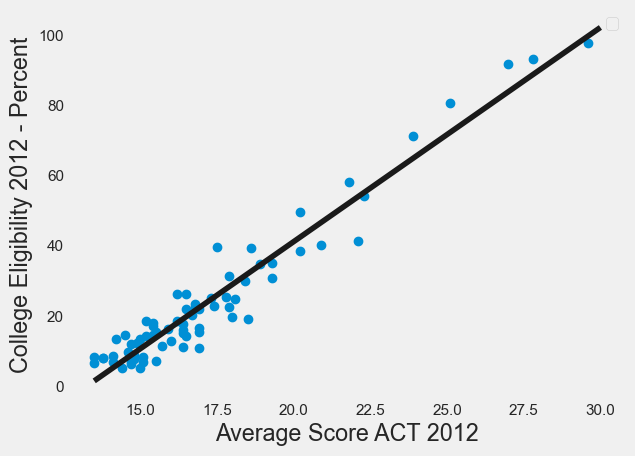

In [5]:
from sklearn.linear_model import LinearRegression #sklearn is a machine learning library
X=df[["Average Score ACT 2012"]]
Y=df[["College Eligibility 2012 - Percent"]]
reg=LinearRegression()
reg.fit(X,Y)
print("Intercept is ", reg.intercept_)
print("Slope is ", reg.coef_)
print("R^2 for OLS is ", reg.score(X,Y))
# x values on the regression line will be between 13.5 and 30 
x = np.linspace(13.5, 30 ,100) 
# define the regression line y = mx+b here
[[m]]=reg.coef_
[b]=reg.intercept_
y =  m*x  + b   
#plot the data points 
fig=df.plot(x="Average Score ACT 2012", y="College Eligibility 2012 - Percent", style='o')  
plt.xlabel("Average Score ACT 2012")  
plt.ylabel("College Eligibility 2012 - Percent")  
# plot the regression line 
plt.plot(x,y, 'k') #add the color for red
plt.legend([],[], frameon=True)
plt.grid()
plt.show()

### Exercise

```{admonition} Exercise
Execute the next cell to retrieve from the Chicago Data Portal school data.  Then, for pre-K - 8 schools in Chicago ZIP Code 60623 make a scatterplot that shows the %black (x-axis) vs. %hispanic (y-axis) and include the OLS regression line on the plot.
```

In [6]:
raw_CPS_data=  pd.read_json('https://data.cityofchicago.org/resource/kh4r-387c.json?$limit=100000')
raw_CPS_data.head(1) 

,school_id,legacy_unit_id,finance_id,short_name,long_name,primary_category,is_high_school,is_middle_school,is_elementary_school,is_pre_school,...,fifth_contact_title,fifth_contact_name,seventh_contact_title,seventh_contact_name,refugee_services,visual_impairments,freshman_start_end_time,sixth_contact_title,sixth_contact_name,hard_of_hearing
0,609966,3750,23531,HAMMOND,Charles G Hammond Elementary School,ES,False,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. K-Means Clustering

In this section, we will illustrate how to cluster a larger number of points in analyzing Chicago violent crime data in the file "Violence.csv"

Data source: Chicago Data Portal (https://data.cityofchicago.org/Public-Safety/Violence-Reduction-Victims-of-Homicides-and-Non-Fa/gumc-mgzr). Data was extracted on December 7th, 2022. 

1)  Read in recent data for 1,000 violent crime occurrences specified by the latitude-longitude location of each incident.

In [7]:
# read from excel file, dropping all entries with N/A values
violence = pd.read_csv('Violence.csv').dropna(subset = ['LATITUDE', 'LONGITUDE'])

# Streamline columns to just latitude and longitude, reduce to just the first 1000 entries
violence = violence[['LATITUDE', 'LONGITUDE']].head(1000)

# Reset the index for consistent numbering
violence = violence.reset_index(drop = True)
print("Size of Dataset", violence.shape)
violence.head(1)

Size of Dataset (1000, 2)


,LATITUDE,LONGITUDE
0,41.865451,-87.72505


2) Next, we map the 1,000 recorded instances to see what we are working with.

In [8]:
chi_map = folium.Map(location=[41.783, -87.621],  tiles="Stamen Toner", zoom_start=10)  #create a basemap

for i in np.arange(0,1000,1):  #add parcel data one
    p=[violence.loc[i,"LATITUDE"],violence.loc[i,"LONGITUDE"]]# by one to the base map.
    folium.CircleMarker(p, radius=1, color = 'gray').add_to(chi_map)
chi_map

3) We've provided a function that will allow you to test different numbers of clusters for the same data. For the purposes of this lab, up to 100 clusters can be used. We will use this function to visualize 22 clusters since there are 22 police districts in Chicago.

In [9]:
# Get the 100 colors used to identify clusters
colorlist = list(mcolors.XKCD_COLORS.values())[:100]

# Make a map that uses k-means clustering to divide locations into up to 100 clusters 
#the inout variable (clusters) specifies the number of clusters. 
#the input variable data specifies the locations.
def make_map(clusters,data):
    assert clusters >= 1, "Number of clusters must be at least 1"
    assert clusters <= len(colorlist), "Number of clusters exceeds maximum amount"
    x=data[['LATITUDE', 'LONGITUDE']]
    k_means = KMeans(n_clusters=clusters)
    k_means.fit(x)
    k_means_labels = k_means.labels_
    
    x['labels'] = k_means_labels
    k_map = folium.Map(location=[41.783, -87.621],  tiles="Stamen Toner", zoom_start=10)

    for i in np.arange(0,len(x),1):  #add parcel data one
        p=[x.loc[i,"LATITUDE"],x.loc[i,"LONGITUDE"]]# by one to the base map.
        k_map.add_child(folium.CircleMarker(p, radius=1,color=colorlist[x.loc[i, 'labels']], fill = True, fill_opacity = 1))
    return   k_map

4) Let's use make_map() to divide the locations into two parts.

In [10]:
make_map(2,violence)

C:\Users\pisihara\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pisihara\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Note that the I55 Expressway which runs northeast from Summit to Chicago is an approximate dividing line between the clusters on the South and West sides of Chicago.

### Assignment

```{admonition} Assignment
Use k-means to divide the crime data into 22 clusters.  How does the result compare
with a map of the 22 Chicago Police Department districts?
```

## 3. PCA

1) The following function converts images in a folder to a matrix of column vectors containing pixel values for each image.

In [11]:
def imagetovector(npix,directory,nimages):
    n=npix  #use nxn pixel image
    # You'll want to store all your images in a folder within the same directory as this notebook. 
    # Enter the name of that directory below.
    directory = directory # example: "images"

    # Dictionaries to store the image data and the dataframes we'll make from them.
    # The dataframes are used to translate data to and from excel.
    imgs = {}
    dfs = {}

    # Each image will be resized to ensure that their proportions are consistent with each other.
    # It's best to start with images that are already similarly sized so that images don't get
    # too distorted in the resize process. 
    # Adjust the size to your preference: (width, height)
    dsize = (n, n)

    # This will iterate over every image in the directory given, read it into data, and create a 
    # dataframe for it. Both the image data and its corresponding dataframe are stored.
    # Note that when being read into data, we interpret the image as grayscale. 
    pos = 0
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(f):
            imgs[pos] = cv2.imread(f, 0) # image data
            imgs[pos] = cv2.resize(imgs[pos], dsize)
            dfs[pos] = pd.DataFrame(imgs[pos]) # dataframe
            pos += 1

    # Exports the image dataframes to an excel file, with each excel sheet representing one image.
    # If there's already an excel file by the same name, it will overwrite it. Note that if the
    # excel file it's attempting to overwrite is already open, the write will be blocked.
    with pd.ExcelWriter('image_data.xlsx') as writer: 
        for i in np.arange(0, len(dfs)):
            dfs[i].to_excel(writer, sheet_name=str(i))
    def matrixtovector(matrix,n,s):
        t=0
        vec=pd.DataFrame()
        for i in np.arange(0,n,1):
            for j in np.arange(0,n,1):
                vec.loc[t,str(s)]=matrix.loc[i,j]
                t=t+1
        return vec

    numimages=nimages
    data=pd.DataFrame()
    for t in np.arange(0,numimages,1):
        data.loc[:,str(t)]=matrixtovector(dfs[t],n,t)            
    return data,imgs

2) Run the next code cells to test if you were able to use the correct path name. If not, go back and check if the images are in the file you copied the path name of, or check if you copied the correct path name. 
- The data set will be the 8 images in the folder "letters" with a $64 \times 64$ resolution.

In [12]:
[traindata,imgs]=imagetovector(64,"letters",8)
traindata.head(4)

,0,1,2,3,4,5,6,7
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


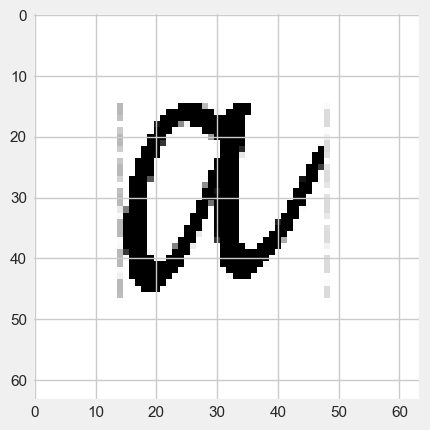

In [13]:
#display the first  image
plt.imshow(imgs[0], cmap="gray") 

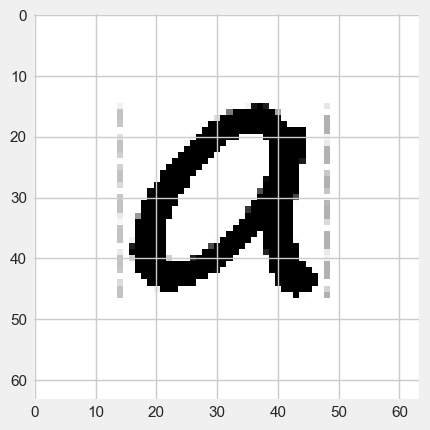

In [14]:
#display the second  image
plt.imshow(imgs[1], cmap="gray") 

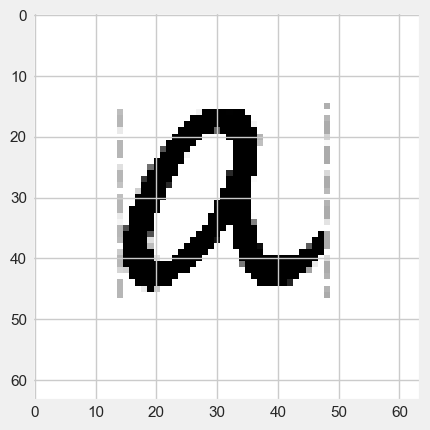

In [15]:
#display the third image
plt.imshow(imgs[2], cmap="gray") 

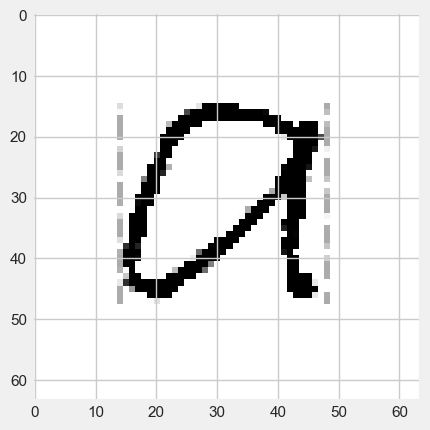

In [16]:
#display the fourth training image
plt.imshow(imgs[3], cmap="gray") 

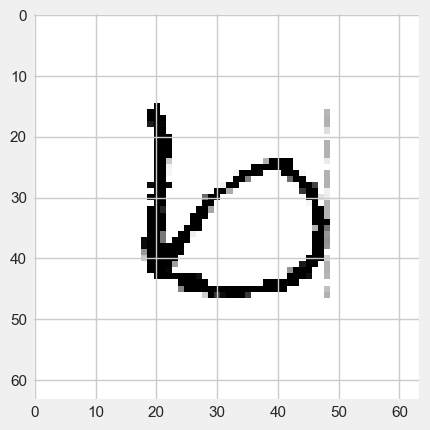

In [17]:
#display the fifth training image
plt.imshow(imgs[4], cmap="gray")

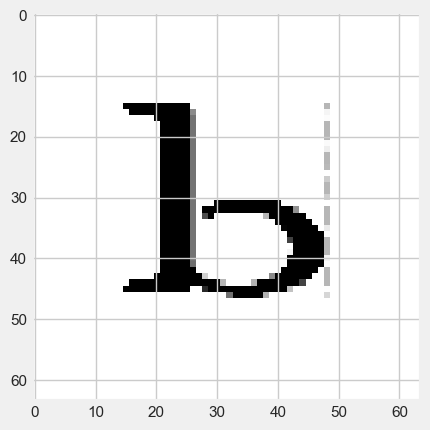

In [18]:
#display the sixth image
plt.imshow(imgs[5], cmap="gray")

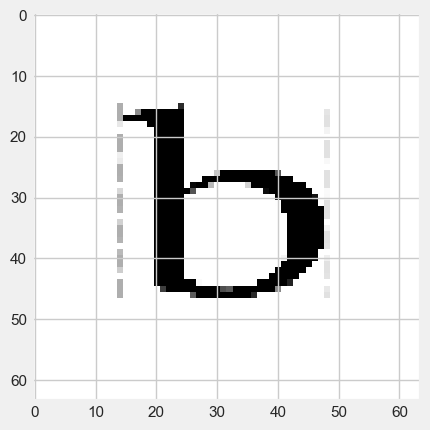

In [19]:
#display the seventh image
plt.imshow(imgs[6], cmap="gray")

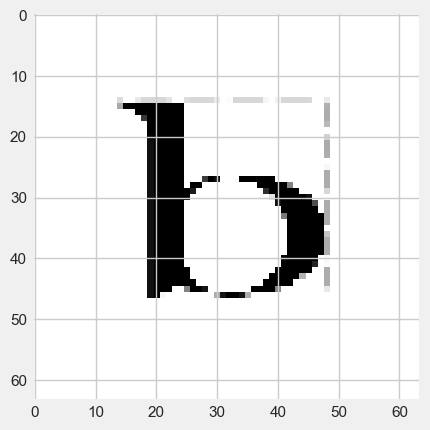

In [20]:
#display the eight image
plt.imshow(imgs[7], cmap="gray")

In [21]:
#store the data in an Excel file
letter=traindata
letter.to_excel("ab.xlsx")

3) We will now use PCA to project the data onto the first 2 principal component vectors.

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(np.transpose(letter))
letter_pca = pca.transform(np.transpose(letter))
print("original shape:   ", np.transpose(letter).shape)
print("transformed shape:", letter_pca.shape)

original shape:    (8, 4096)
transformed shape: (8, 2)


4) Let's check how well we can recognize the  2-dimensional versions of the first image.

In [23]:
filtered = pca.inverse_transform(letter_pca)

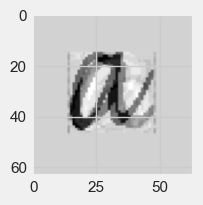

In [24]:
fig=plt.figure(figsize=(2,2))
plt.gca().imshow(filtered[0].reshape(64, 64),
                  cmap="gray")

5) Here is the image of the first principal component vector.

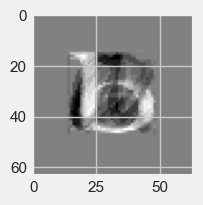

In [25]:
fig=plt.figure(figsize=(2,2))
plt.gca().imshow(pca.components_[0].reshape(64, 64),
                                 cmap="gray")

### Exercise

```{admonition} Exercise
a) Display the two-dimensional version of the 5th image (the first letter b) 

b) Display the image corresponding to the first and the second principal component vectors.

c) Give the components of the image in part a) in terms of the vectors in part b)

d) What would happen if instead of using the PCA basis, we used two standard basis vectors for the projections  (eg. $e_1=(1,0,0,0,...,0)$ and $e_2=(0,1,0,0,...,0)$?
```

## 4. Support Vector Machines

Given a data set with each point labeled by membership in one of two classes, support vector machines (SVMs) can be used to create a classification of all such data using a linear boundary.

Here we will explore Chicago housing data by ZIP Code. In particular, we will look at the median monthly rent in 2016 and the proportion of single parents in 2016.

Datafile: Housing.xlsx

Source: American Community Survey

1) Let's read in the data.

In [26]:
housing = pd.read_excel('Housing.xlsx') 
housing.head(2)

,Unnamed: 0,rent,singleparent,income
0,0,815,0.2362,41380
1,1,905,0.3673,42253


2) Let's create a column "rent burden" which gives the proportion of income spent on rent. We will label households spending less than $30\%$ as class 0 (not rent-burdened)  and the remainder in class 1 (rent-burdened).

In [27]:
for i in housing.index:
    housing.loc[i,"rent burden"]=12*housing.loc[i,"rent"]/housing.loc[i,"income"]
    if housing.loc[i,"rent burden"]<.3:
        housing.loc[i,"class"]=0
    else:
        housing.loc[i,"class"]=1
housing.head(10)

,Unnamed: 0,rent,singleparent,income,rent burden,class
0,0,815,0.2362,41380,0.236346,0.0
1,1,905,0.3673,42253,0.257023,0.0
2,2,677,0.4372,39784,0.204203,0.0
3,3,1019,0.0437,60510,0.202082,0.0
4,4,1306,0.4110,96576,0.162276,0.0
5,5,1617,0.0631,148825,0.130381,0.0
6,6,980,0.2852,48652,0.241717,0.0
7,7,921,0.3333,34741,0.318126,1.0
8,8,764,0.5053,32095,0.285652,0.0
9,9,939,0.8277,33805,0.333323,1.0


3) Let's make a graph of "x = rent burden" and "y = singleparent"

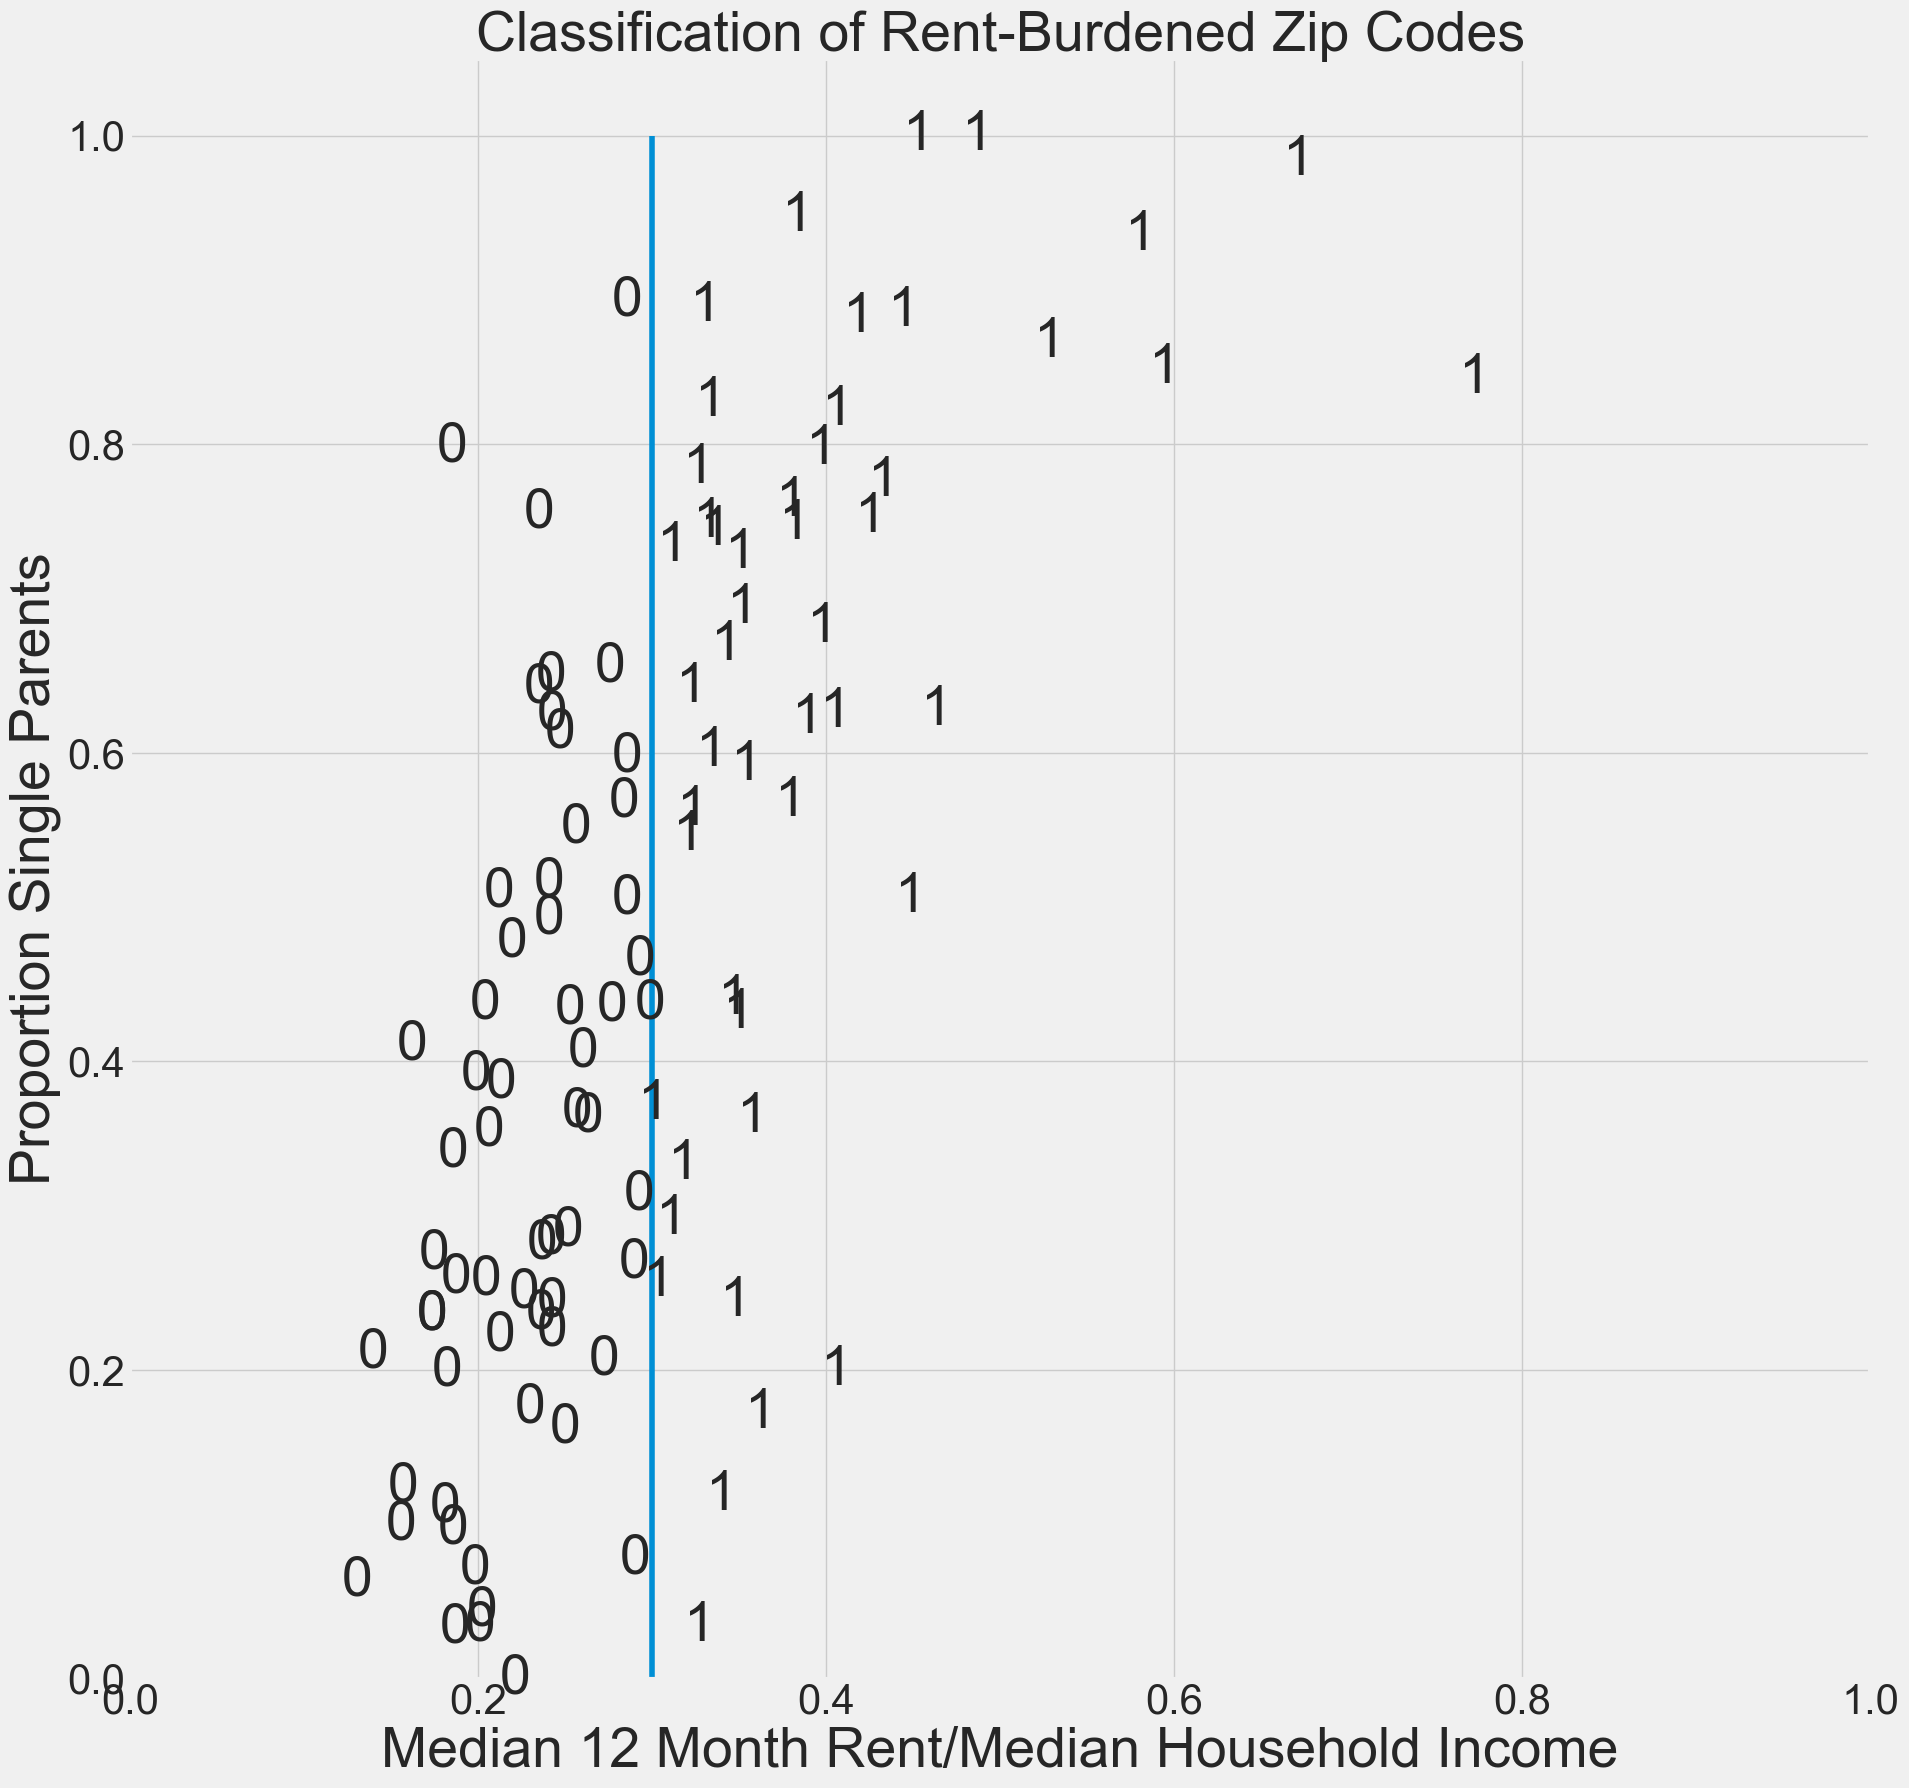

In [28]:
#create a figure
plt.figure(figsize=(20,20))
plt.xlim(0,1)
plt.ylim(0,1.05)


for i in housing.index:
    if housing.loc[i,"class"]==0:
        plt.text(housing.loc[i,"rent burden"],housing.loc[i,"singleparent"],0,size=40,ha='center',va='center')
    else:
        plt.text(housing.loc[i,"rent burden"],housing.loc[i,"singleparent"],1,size=40,ha='center',va='center')
        
# Add the hyperplane

xx=np.linspace(.3,.3000001,100)
yy = np.linspace(0,1,100)
plt.plot(xx, yy)

plt.xlabel("Median 12 Month Rent/Median Household Income",size=40)   
plt.ylabel("Proportion Single Parents",size=40)
plt.xticks(size=30)
plt.yticks(size=30)
plt.title("Classification of Rent-Burdened Zip Codes",size=40)
plt.savefig("chihousing1.png")
plt.show()

4) Now let's use support vector machine classification to read in the data points and to find a hyperplane (straight line) that is used as the basis of classification.

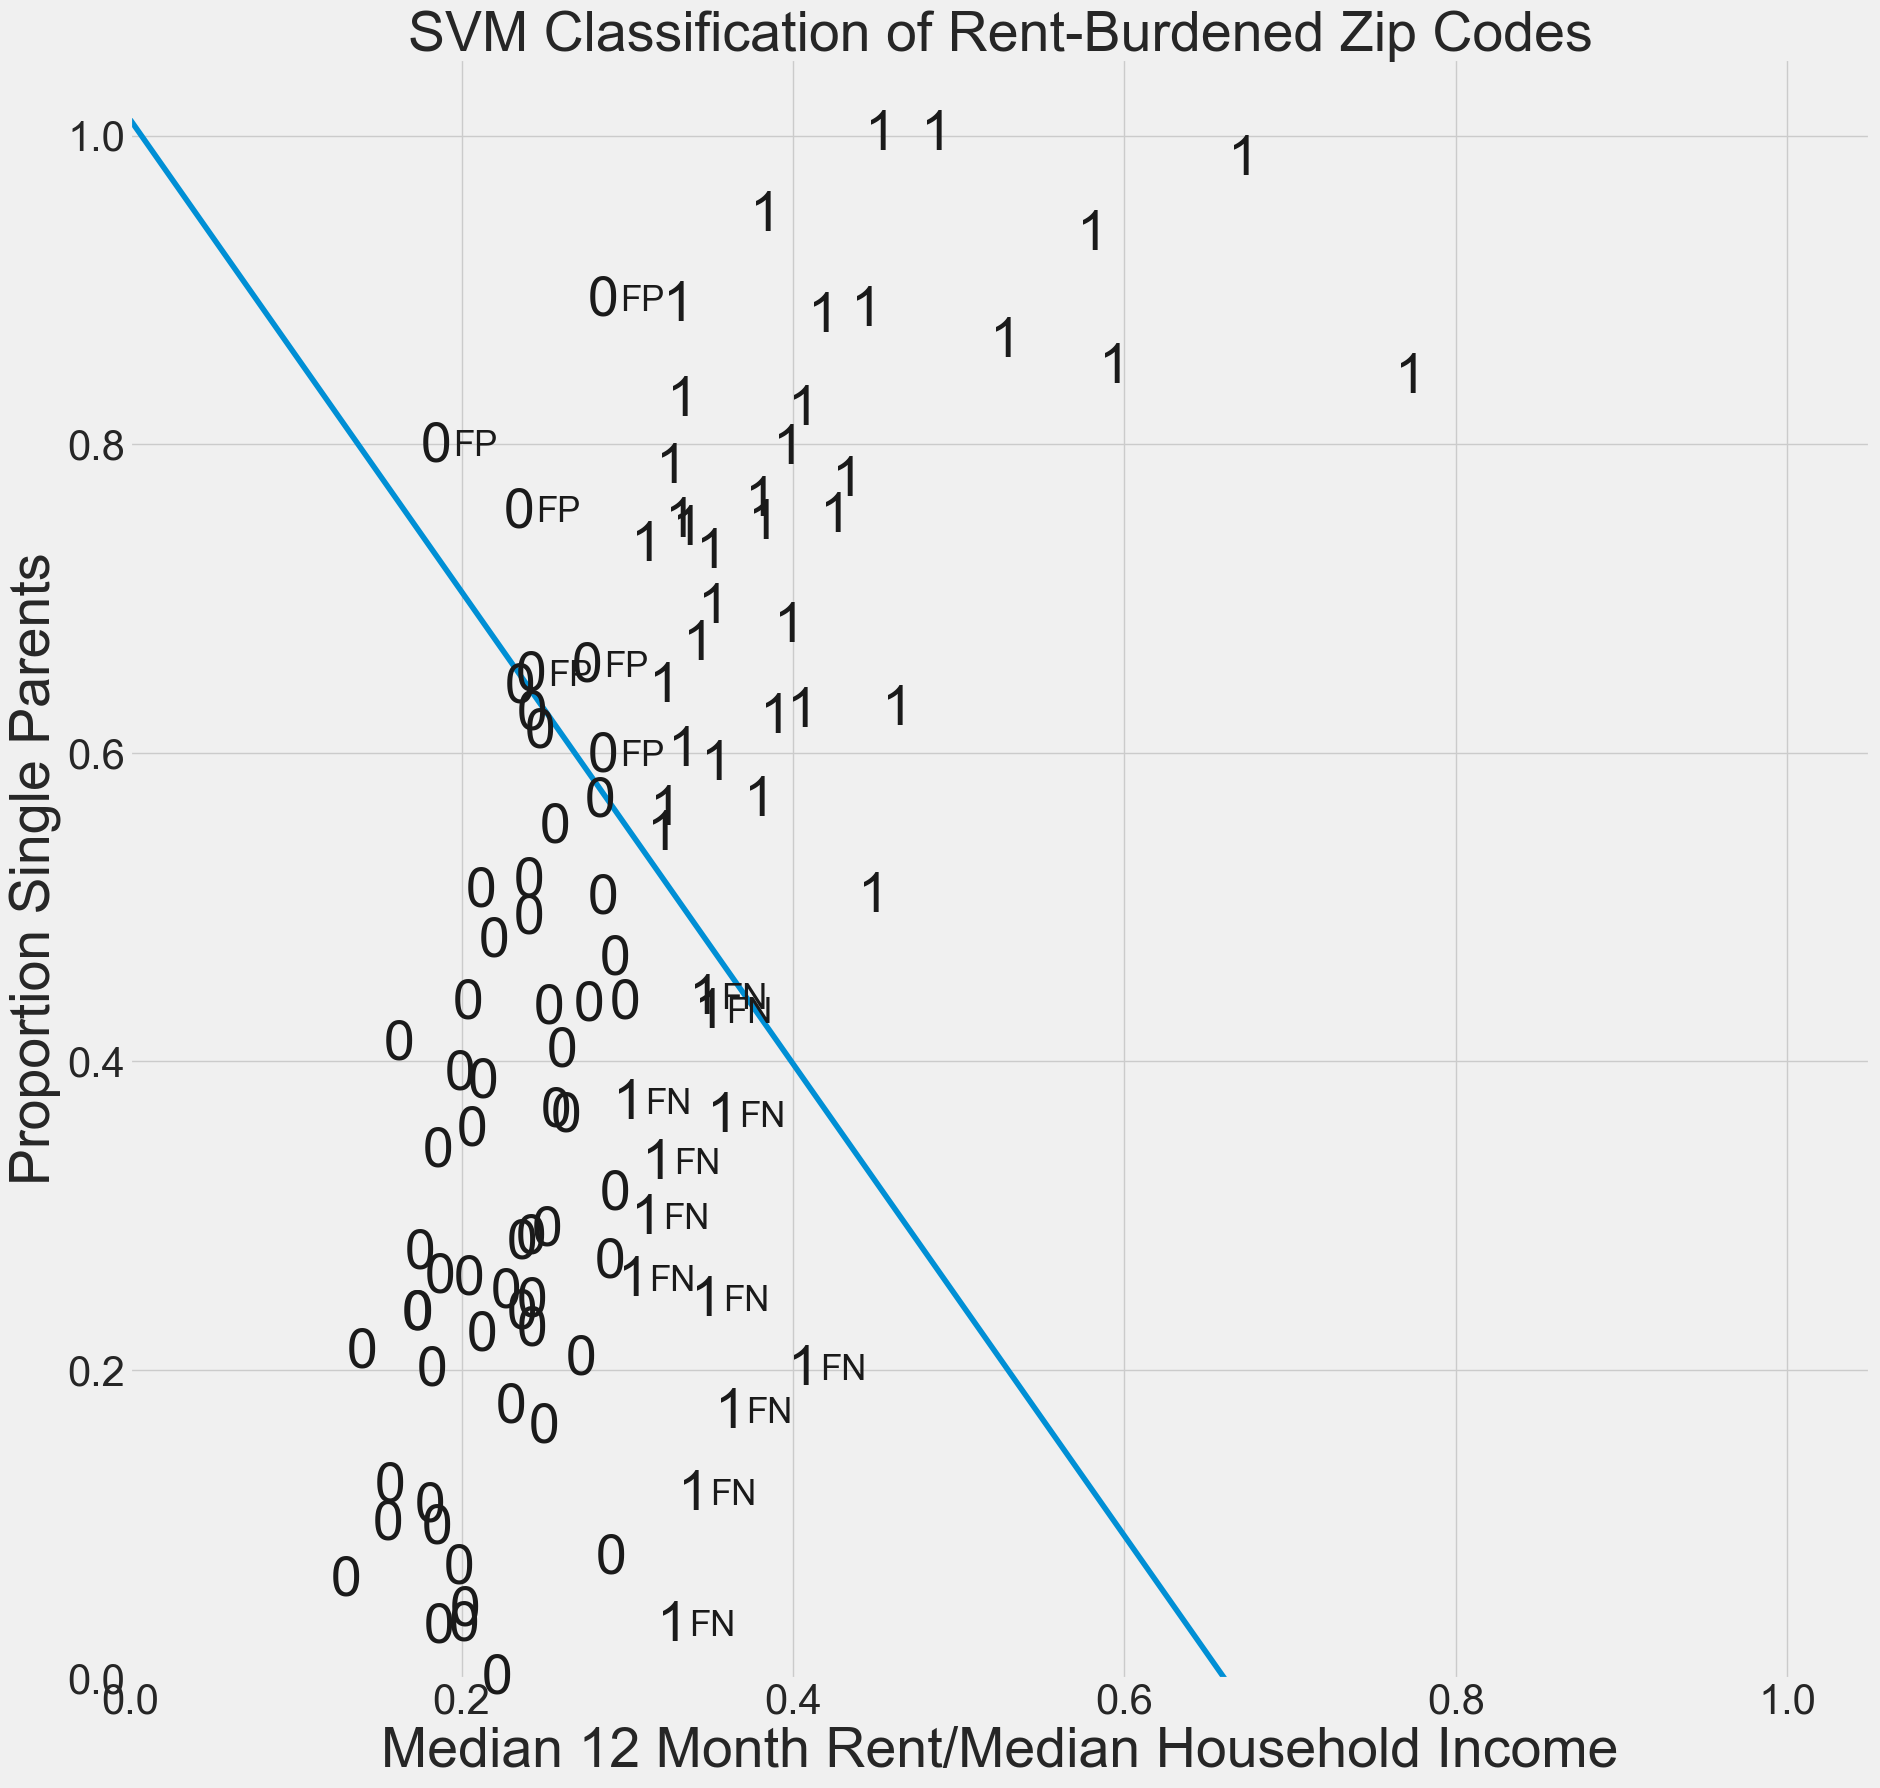

In [29]:
# Creates a model to fit the housing data to a linear hyperplane. 
# We set the cost C to the default cost of 1. 
model = SVC(kernel='linear', C=1)
X=housing[["rent burden","singleparent"]]
Y=housing["class"]
model.fit(X,Y)
#create a figure
plt.figure(figsize=(20,20))
plt.xlim(0,1.05)
plt.ylim(0,1.05)
   
TP=0 
FP=0
TN=0
FN=0

# Add the hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 10)
yy = a * xx - (model.intercept_[0]) / w[1]
plt.plot(xx, yy)

for i in housing.index:
    x=housing.loc[i,"rent burden"]
    y=housing.loc[i,"singleparent"]
    if (housing.loc[i,"class"]==1 and y>a * x - (model.intercept_[0]) / w[1]):
        plt.text(housing.loc[i,"rent burden"],housing.loc[i,"singleparent"],"1",color='k',size=40,va='center',ha='center')
        TP=TP+1
    if (housing.loc[i,"class"]==1 and y<a * x - (model.intercept_[0]) / w[1]):
        plt.text(housing.loc[i,"rent burden"],housing.loc[i,"singleparent"],"1",color="k",size=40,va='center',ha='center')
    if (housing.loc[i,"class"]==1 and y<a * x - (model.intercept_[0]) / w[1]):
        plt.text(housing.loc[i,"rent burden"]+.01,housing.loc[i,"singleparent"],"FN",color="k",size=25,va='center',ha='left')
        FN=FN+1
    if (housing.loc[i,"class"]==0 and y>a * x - (model.intercept_[0]) / w[1]):
        plt.text(housing.loc[i,"rent burden"],housing.loc[i,"singleparent"],"0",color='k',size=40,va='center',ha='center')
        TN=TN+1
    if (housing.loc[i,"class"]==0 and y>a * x - (model.intercept_[0]) / w[1]):
        plt.text(housing.loc[i,"rent burden"]+.01,housing.loc[i,"singleparent"],"FP",color='k',size=25,va='center',ha='left')
        FP=FP+1
    if housing.loc[i,"class"]==0 and y<a * x - (model.intercept_[0]) / w[1]:
        plt.text(housing.loc[i,"rent burden"],housing.loc[i,"singleparent"],"0",color='k',size=40,va='center',ha='center')    
plt.xlabel("Median 12 Month Rent/Median Household Income",size=40)   
plt.ylabel("Proportion Single Parents",size=40)
plt.title("SVM Classification of Rent-Burdened Zip Codes",size=40)
plt.xticks(size=30)
plt.yticks(size=30)
plt.savefig("chihousing2.png")
plt.show()

Note that the SVM hyperplane does not correctly classify the labeled data. Find formulas for precision and recall and give these misclassification scores. Also give the F-score, which is the geometric mean of recall and precision.

In [30]:
print("TP=",TP)
print("FP=",FP)
print("FN=",FN)
print("TN=",TN)
N=TP+FP+TN+FN
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
print("Accuracy=", (TP+TN)/N) #Percentage of correct predictions 
print("Recall=", TP/(TP+FN))  #Percent of actual rent budened household correctly predicted
print("Precision=", TP/(TP+FP)) #Percent of predicted rent burdened households that are correctly predicted
print("F-score=",  (2 * Precision * Recall) / (Precision + Recall))

TP= 36
FP= 6
FN= 12
TN= 6
Accuracy= 0.7
Recall= 0.75
Precision= 0.8571428571428571
F-score= 0.7999999999999999


By increasing the value of the regularization parameter C, we can reduce misclassifications.

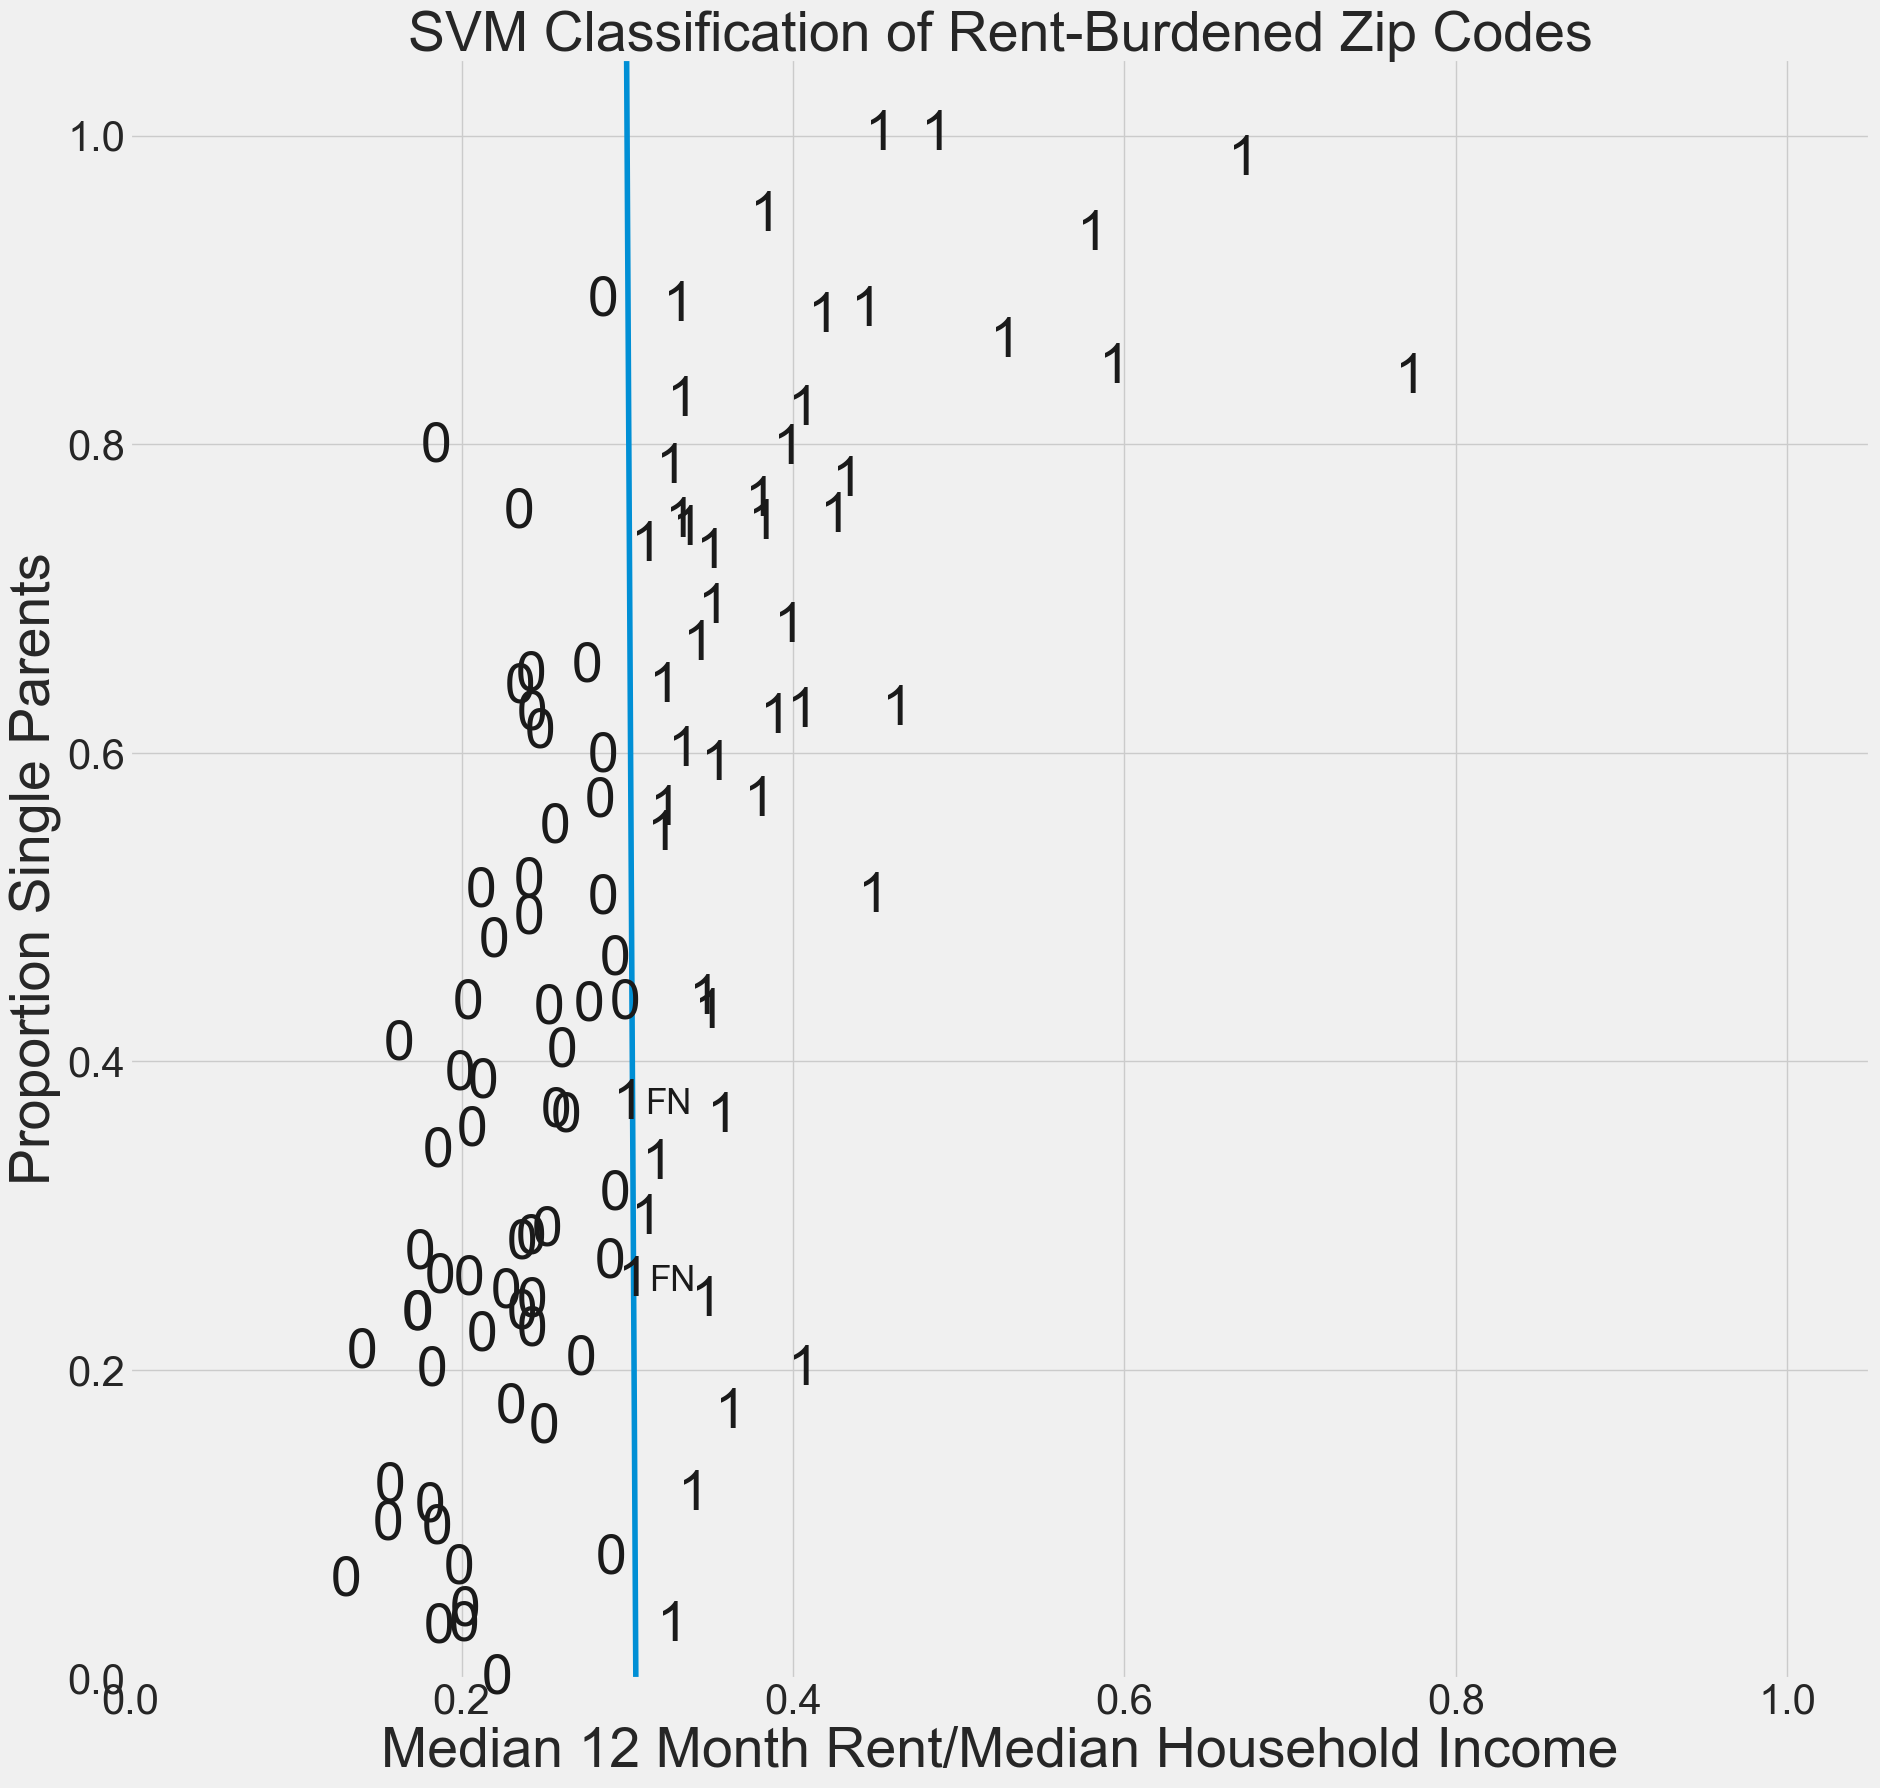

In [31]:
# Creates a model to fit the housing data to a linear hyperplane. 
# We increase the cost C to the cost of 1000. 
model = SVC(kernel='linear', C=1000)
X=housing[["rent burden","singleparent"]]
Y=housing["class"]
model.fit(X,Y)
#create a figure
plt.figure(figsize=(20,20))
plt.xlim(0,1.05)
plt.ylim(0,1.05)
   
TP=0 
FP=0
TN=0
FN=0

# Add the hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 10)
yy = a * xx - (model.intercept_[0]) / w[1]
plt.plot(xx, yy)

for i in housing.index:
    x=housing.loc[i,"rent burden"]
    y=housing.loc[i,"singleparent"]
    if (housing.loc[i,"class"]==1 and y>a * x - (model.intercept_[0]) / w[1]):
        plt.text(housing.loc[i,"rent burden"],housing.loc[i,"singleparent"],"1",color='k',size=40,va='center',ha='center')
        TP=TP+1
    if (housing.loc[i,"class"]==1 and y<a * x - (model.intercept_[0]) / w[1]):
        plt.text(housing.loc[i,"rent burden"],housing.loc[i,"singleparent"],"1",color="k",size=40,va='center',ha='center')
    if (housing.loc[i,"class"]==1 and y<a * x - (model.intercept_[0]) / w[1]):
        plt.text(housing.loc[i,"rent burden"]+.01,housing.loc[i,"singleparent"],"FN",color="k",size=25,va='center',ha='left')
        FN=FN+1
    if (housing.loc[i,"class"]==0 and y>a * x - (model.intercept_[0]) / w[1]):
        plt.text(housing.loc[i,"rent burden"],housing.loc[i,"singleparent"],"0",color='k',size=40,va='center',ha='center')
        TN=TN+1
    if (housing.loc[i,"class"]==0 and y>a * x - (model.intercept_[0]) / w[1]):
        plt.text(housing.loc[i,"rent burden"]+.01,housing.loc[i,"singleparent"],"FP",color='k',size=25,va='center',ha='left')
        FP=FP+1
    if housing.loc[i,"class"]==0 and y<a * x - (model.intercept_[0]) / w[1]:
        plt.text(housing.loc[i,"rent burden"],housing.loc[i,"singleparent"],"0",color='k',size=40,va='center',ha='center')    
plt.xlabel("Median 12 Month Rent/Median Household Income",size=40)   
plt.ylabel("Proportion Single Parents",size=40)
plt.title("SVM Classification of Rent-Burdened Zip Codes",size=40)
plt.xticks(size=30)
plt.yticks(size=30)
plt.savefig("chihousing3.png")
plt.show()

### Image Recognition

We will now show how SVM can be used in image recognition.

Download the [images](https://drive.google.com/drive/folders/1R_0WLLd-ZgK_dGZ58Z6uLi-jggBQXoBy?usp=sharing) folder and put the 'images' sub-folder in the same folder as this notebook.

Find the pathname of the file on your hard drive, copy it to your clipboard, and paste it in the quotations of the second argument below.   - Instructions on gathering the pathname for Windows operating systems can be found [here](https://www.howtogeek.com/670447/how-to-copy-the-full-path-of-a-file-on-windows-10/), and for Mac operating systems can be found [here](https://setapp.com/how-to/how-to-find-the-path-of-a-file-in-mac).

 Run the next three code cells to test if you were able to use the correct path name. If not, go back and check if the images are in the file you copied the path name of, or check if you copied the correct path name. 
- The training set will be the 6 images in the folder "images" with a $32 \times 32$ resolution.

In [32]:
[traindata,imgs]=imagetovector(32,"images",6)
traindata.head(2)

,0,1,2,3,4,5
0,92.0,108.0,65.0,176.0,21.0,86.0
1,82.0,111.0,65.0,182.0,28.0,84.0


 Run the cell below to train a linear support vector machine on the training images. This is building a hyperplane in an $n = 1024$ dimensional space to separate the data.
- Notice how the `Y` variable is the vector of classes for each image. This is because 0 corresponds to Mayor Daley, and 1 corresponds to Mayor Washington.

In [33]:
model = SVC(kernel='linear', C=1)
X=[traindata.loc[:,"0"],traindata.loc[:,"1"],traindata.loc[:,"2"],traindata.loc[:,"3"],traindata.loc[:,"4"],traindata.loc[:,"5"]]
Y=[0,0,0,1,1,1] #Labels the images 0=Mayor Daley 1=Mayor Washington
model.fit(X,Y)
ypred=model.predict(X)
ypred

array([0, 0, 0, 1, 1, 1])

Ideally, an SVM will perfectly classify the exact data it was trained on. This model does happen to correctly identify which mayor is which. Check to see if the `Y` vector matches the `y_pred` vector.

Download the [imagestestingset](https://drive.google.com/drive/folders/1A_uNIvjO6Y4k3lrFNYA-psfQU0l7SE3C?usp=sharing) folder from the Google Drive onto your hard drive. Place the folder in the same directory as this notebook and the other training image folder. 

Copy the folder path name and paste it into the second argument of the `imagetovector` function below, denoted  `__CHANGE__THIS__TO__TRAINING__IMAGE__PATHNAME__`.

- The test set will be the 4 images in the folder "testimages" with a $32 \times 32$ resolution.

In [34]:
[testdata,testimgs]=imagetovector(32,"testimages",4)
testdata.tail(2)

,0,1,2,3
1022,18.0,55.0,47.0,13.0
1023,19.0,48.0,52.0,169.0


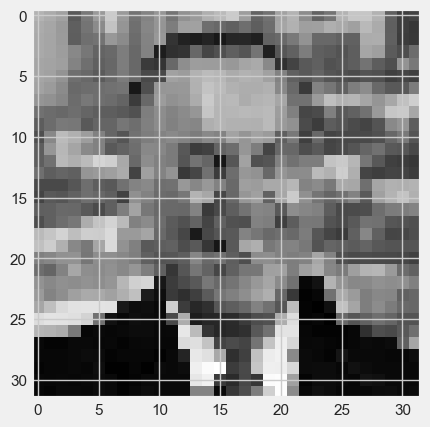

In [35]:
#display the first test image
plt.imshow(testimgs[0], cmap="gray") 

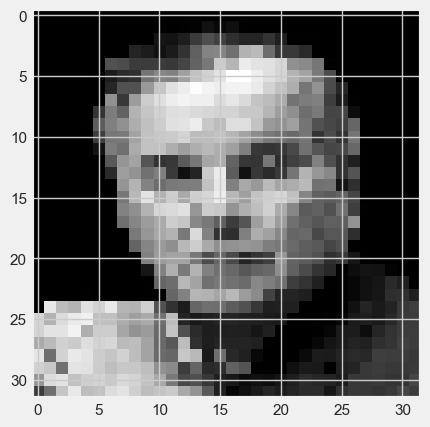

In [36]:
#display the second test image
plt.imshow(testimgs[1], cmap="gray") 

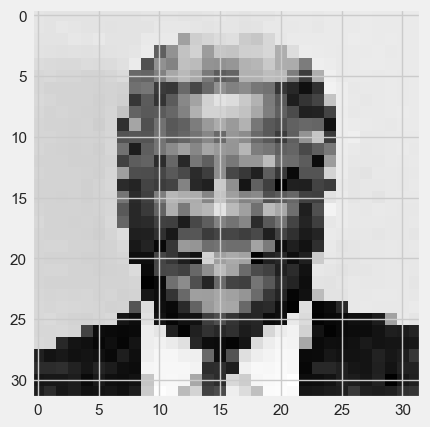

In [37]:
#display the third test image
plt.imshow(testimgs[2], cmap="gray") 

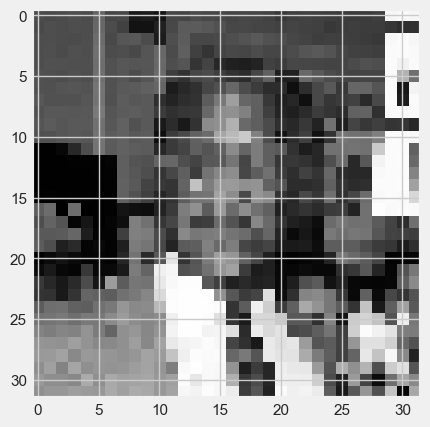

In [38]:
#display the fourth test image
plt.imshow(testimgs[3], cmap="gray") 

 Run the two lines in the cell below to see how the SVM classifies the 4 new images in the folder "testimages" (the values should be $[0,0,1,1]$ since the first two images are Mayor Daley and the second two are Mayor Washingon)

In [39]:
Xtest=[testdata.loc[:,"0"],testdata.loc[:,"1"],testdata.loc[:,"2"],testdata.loc[:,"3"]]
model.predict(Xtest)

array([1, 0, 1, 1])

(Note: An ouput of [1,0,1,1], for example, would indicate that the SVM misclassifies the first image as Mayor Washington, and gets the other three images correct.)

### Exercise

```{admonition}Exercise
Repeat the above analysis using images of Michelle Obama and Hillary Clinton (both First Ladies were raised in Chicago).
```